<a href="https://colab.research.google.com/github/Aryan-Gupta2002/Deep-Learning---Tensorflow/blob/main/PreProcessing__regressionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is to pre process, clean our dataset and make it ready before passing it to model

##Preprocessing Data(Normalization & Standardization)
https://www.geeksforgeeks.org/machine-learning/feature-engineering-scaling-normalization-and-standardization/  
In terms of scaling values , neural networks tend to prefer narmalization.  
https://medium.com/data-science/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#Reading dataset
insurance1= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can use skleatn

Min-Max Scaler  
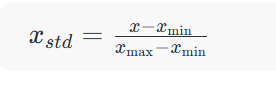  
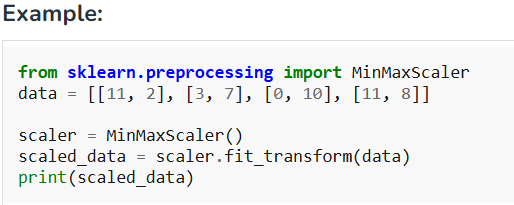

In [2]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
#Creating a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),# turns all columns values between 0 & 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# Creating x and y
x=insurance1.drop("charges",axis=1)
y=insurance1["charges"]
# Splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# Fit the column transformer to our training data
ct.fit(x_train)
#Transform training and testing data with normalization (MinMax Scaler) and OneHot Encoding
x_trainNormal = ct.transform(x_train)
x_testNormal = ct.transform(x_test)

In [3]:
x_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [4]:
x_trainNormal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [5]:
x_train.shape,x_trainNormal.shape

((1070, 6), (1070, 11))

Our data is now successfuly pre-processed. Now we need to train our model

In [6]:
# Training Sequential Neural Network Model on pre-processed dataset
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mse"]
)
historyLoss=insurance_model.fit(x_trainNormal,y_train,epochs=200)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13296.2764 - mse: 318376320.0000
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13287.9102 - mse: 318153888.0000
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13266.6660 - mse: 317585344.0000
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13222.0996 - mse: 316389408.0000
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13143.6221 - mse: 314287712.0000
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13020.8818 - mse: 311020352.0000
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12843.7354 - mse: 306353088.0000
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12602.1982 - mse: 300086688.0000
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12286.5254 - mse: 292069536.0000
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11890.8955 - mse: 282237728.0000
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11423.5215 - mse: 2

In [8]:
# Evaluating model trained on normalized data
insurance_model.evaluate(x_testNormal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3214.2437 - mse: 43053252.0000


[3161.034912109375, 43196112.0]

Text(0, 0.5, 'loss')

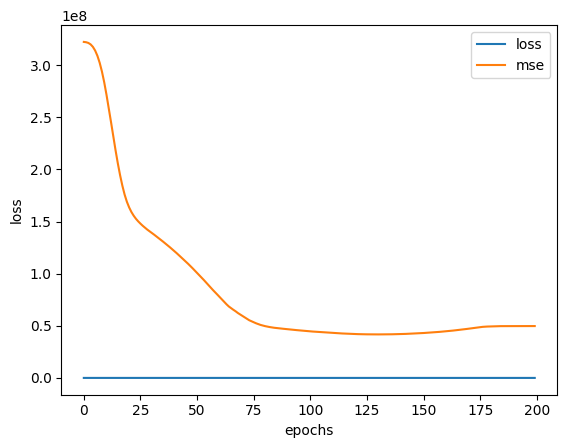

In [9]:
pd.DataFrame(historyLoss.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")